In [1]:
#Preprocessing and Visualization #
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder


#Feature selection & Model selection#
from sklearn.feature_selection import SelectFromModel,RFE,SelectKBest, f_classif
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV,RandomizedSearchCV,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import lightgbm as lgb
import csv

#Metrics
from sklearn.metrics import cohen_kappa_score,f1_score,accuracy_score,confusion_matrix,recall_score,precision_score,classification_report,ConfusionMatrixDisplay

#To handle warnings
from sklearn.exceptions import UndefinedMetricWarning
import warnings
warnings.filterwarnings("ignore", category=UndefinedMetricWarning, module='sklearn')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# To load dataset from Kaggle. Click on Add Data->Search for Arrhythmia-ECG  Dataset from UCI->
#Copy the CSV file path under Input and paste it here

data = pd.read_csv("/kaggle/input/arrhythmia-ecg-dataset-from-uci/arrhythmia.csv")

# to load dataset from Google Collab
#filepath='/content/sample_data/arrhythmia.csv'
#data=pd.read_csv(filepath)


In [5]:
#Dataset Dimension#
data.shape

(452, 280)

In [ ]:
# View DataSet #
with pd.option_context("display.max_rows", None, 'display.max_columns', None):
    display(data)

In [8]:
# Statistical Analysis#
with pd.option_context("display.max_rows", None, 'display.max_columns', None):
    display(data.describe())

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,T,P,QRST,J,heartrate,chDI_Qwave,chDI_Rwave,chDI_Swave,chDI_RPwave,chDI_SPwave,chDI_intrinsicReflecttions,chDI_RRwaveExists,chDI_DD_RRwaveExists,chDI_RPwaveExists,chDI_DD_RPwaveExists,chDI_RTwaveExists,chDI_DD_RTwaveExists,chDII_Qwave,chDII_Rwave,chDII_Swave,chDII_RPwave,chDII_SPwave,chDII_intrinsicReflecttions,chDII_RRwaveExists,chDII_DD_RRwaveExists,chDII_RPwaveExists,chDII_DD_RPwaveExists,chDII_RTwaveExists,chDII_DD_RTwaveExists,chDIII_Qwave,chDIII_Rwave,chDIII_Swave,chDIII_RPwave,chDIII_SPwave,chDIII_intrinsicReflecttions,chDIII_RRwaveExists,chDIII_DD_RRwaveExists,chDIII_RPwaveExists,chDIII_DD_RPwaveExists,chDIII_RTwaveExists,chDIII_DD_RTwaveExists,chAVR_Qwave,chAVR_Rwave,chAVR_Swave,chAVR_RPwave,chAVR_SPwave,chAVR_intrinsicReflecttions,chAVR_RRwaveExists,chAVR_DD_RRwaveExists,chAVR_RPwaveExists,chAVR_DD_RPwaveExists,chAVR_RTwaveExists,chAVR_DD_RTwaveExists,chAVL_Qwave,chAVL_Rwave,chAVL_Swave,chAVL_RPwave,chAVL_SPwave,chAVL_intrinsicReflecttions,chAVL_RRwaveExists,chAVL_DD_RRwaveExists,chAVL_RPwaveExists,chAVL_DD_RPwaveExists,chAVL_RTwaveExists,chAVL_DD_RTwaveExists,chAVF_Qwave,chAVF_Rwave,chAVF_Swave,chAVF_RPwave,chAVF_SPwave,chAVF_intrinsicReflecttions,chAVF_RRwaveExists,chAVF_DD_RRwaveExists,chAVF_RPwaveExists,chAVF_DD_RPwaveExists,chAVF_RTwaveExists,chAVF_DD_RTwaveExists,chV1_Qwave,chV1_Rwave,chV1_Swave,chV1_RPwave,chV1_SPwave,chV1_intrinsicReflecttions,chV1_RRwaveExists,chV1_DD_RRwaveExists,chV1_RPwaveExists,chV1_DD_RPwaveExists,chV1_RTwaveExists,chV1_DD_RTwaveExists,chV2_Qwave,chV2_Rwave,chV2_Swave,chV2_RPwave,chV2_SPwave,chV2_intrinsicReflecttions,chV2_RRwaveExists,chV2_DD_RRwaveExists,chV2_RPwaveExists,chV2_DD_RPwaveExists,chV2_RTwaveExists,chV2_DD_RTwaveExists,chV3_Qwave,chV3_Rwave,chV3_Swave,chV3_RPwave,chV3_SPwave,chV3_intrinsicReflecttions,chV3_RRwaveExists,chV3_DD_RRwaveExists,chV3_RPwaveExists,chV3_DD_RPwaveExists,chV3_RTwaveExists,chV3_DD_RTwaveExists,chV4_Qwave,chV4_Rwave,chV4_Swave,chV4_RPwave,chV4_SPwave,chV4_intrinsicReflecttions,chV4_RRwaveExists,chV4_DD_RRwaveExists,chV4_RPwaveExists,chV4_DD_RPwaveExists,chV4_RTwaveExists,chV4_DD_RTwaveExists,chV5_Qwave,chV5_Rwave,chV5_Swave,chV5_RPwave,chV5_SPwave,chV5_intrinsicReflecttions,chV5_RRwaveExists,chV5_DD_RRwaveExists,chV5_RPwaveExists,chV5_DD_RPwaveExists,chV5_RTwaveExists,chV5_DD_RTwaveExists,chV6_Qwave,chV6_Rwave,chV6_Swave,chV6_RPwave,chV6_SPwave,chV6_intrinsicReflecttions,chV6_RRwaveExists,chV6_DD_RRwaveExists,chV6_RPwaveExists,chV6_DD_RPwaveExists,chV6_RTwaveExists,chV6_DD_RTwaveExists,chDI_JJwaveAmp,chDI_QwaveAmp,chDI_RwaveAmp,chDI_SwaveAmp,chDI_RPwaveAmp,chDI_SPwaveAmp,chDI_PwaveAmp,chDI_TwaveAmp,chDI_QRSA,chDI_QRSTA,chDII_JJwaveAmp,chDII_QwaveAmp,chDII_RwaveAmp,chDII_SwaveAmp,chDII_RPwaveAmp,chDII_SPwaveAmp,chDII_PwaveAmp,chDII_TwaveAmp,chDII_QRSA,chDII_QRSTA,chDIII_JJwaveAmp,chDIII_QwaveAmp,chDIII_RwaveAmp,chDIII_SwaveAmp,chDIII_RPwaveAmp,chDIII_SPwaveAmp,chDIII_PwaveAmp,chDIII_TwaveAmp,chDIII_QRSA,chDIII_QRSTA,chAVR_JJwaveAmp,chAVR_QwaveAmp,chAVR_RwaveAmp,chAVR_SwaveAmp,chAVR_RPwaveAmp,chAVR_SPwaveAmp,chAVR_PwaveAmp,chAVR_TwaveAmp,chAVR_QRSA,chAVR_QRSTA,chAVL_JJwaveAmp,chAVL_QwaveAmp,chAVL_RwaveAmp,chAVL_SwaveAmp,chAVL_RPwaveAmp,chAVL_SPwaveAmp,chAVL_PwaveAmp,chAVL_TwaveAmp,chAVL_QRSA,chAVL_QRSTA,chAVF_JJwaveAmp,chAVF_QwaveAmp,chAVF_RwaveAmp,chAVF_SwaveAmp,chAVF_RPwaveAmp,chAVF_SPwaveAmp,chAVF_PwaveAmp,chAVF_TwaveAmp,chAVF_QRSA,chAVF_QRSTA,chV1_JJwaveAmp,chV1_QwaveAmp,chV1_RwaveAmp,chV1_SwaveAmp,chV1_RPwaveAmp,chV1_SPwaveAmp,chV1_PwaveAmp,chV1_TwaveAmp,chV1_QRSA,chV1_QRSTA,chV2_JJwaveAmp,chV2_QwaveAmp,chV2_RwaveAmp,chV2_SwaveAmp,chV2_RPwaveAmp,chV2_SPwaveAmp,chV2_PwaveAmp,chV2_TwaveAmp,chV2_QRSA,chV2_QRSTA,chV3_JJwaveAmp,chV3_QwaveAmp,chV3_RwaveAmp,chV3_SwaveAmp,chV3_RPwaveAmp,chV3_SPwaveAmp,chV3_PwaveAmp,chV3_TwaveAmp,chV3_QRSA,chV3_QRSTA,chV4_JJwaveAmp,chV4_QwaveAmp,chV4_RwaveAmp,chV4_SwaveAmp,chV4_RPwaveAmp,chV4_SPwaveAmp,chV4_PwaveAmp,chV4_TwaveAmp,chV4_QRSA,chV4

In [9]:
#Data Types#
with pd.option_context("display.max_rows", None, 'display.max_columns', None):
    display(data.dtypes)


age                               int64
sex                               int64
height                            int64
weight                            int64
QRSduration                       int64
PRinterval                        int64
Q-Tinterval                       int64
Tinterval                         int64
Pinterval                         int64
QRS                               int64
T                               float64
P                               float64
QRST                            float64
J                               float64
heartrate                       float64
chDI_Qwave                        int64
chDI_Rwave                        int64
chDI_Swave                        int64
chDI_RPwave                       int64
chDI_SPwave                       int64
chDI_intrinsicReflecttions        int64
chDI_RRwaveExists                 int64
chDI_DD_RRwaveExists              int64
chDI_RPwaveExists                 int64
chDI_DD_RPwaveExists              int64


In [3]:
# Missing values
data.isna().sum().sort_values(ascending=False)

J                             376
P                              22
T                               8
QRST                            1
heartrate                       1
                             ... 
chV2_RPwave                     0
chV2_SPwave                     0
chV2_intrinsicReflecttions      0
chV2_RRwaveExists               0
class                           0
Length: 280, dtype: int64

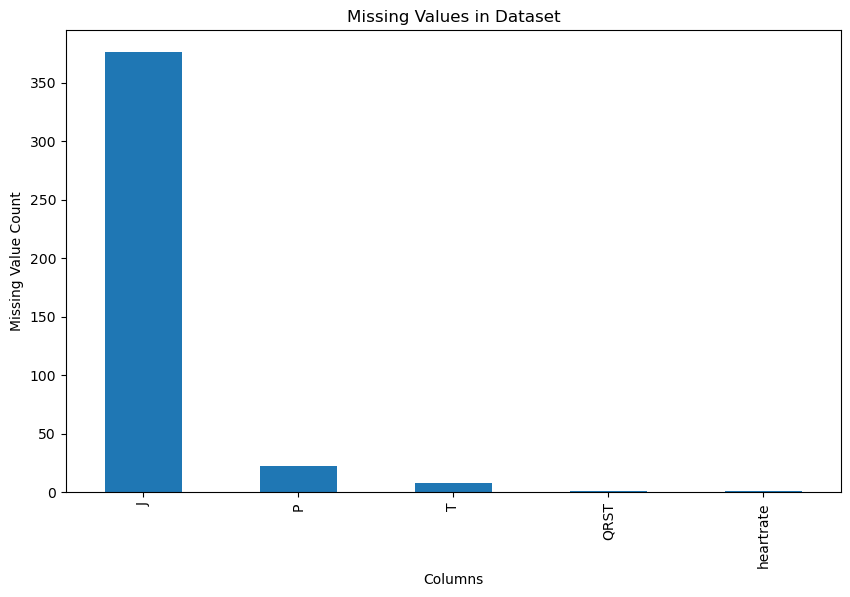

In [3]:
# visualize missing values
missing_values=['J','P','T','QRST','heartrate']
missingdata = data[missing_values].isna().sum()
plt.figure(figsize=(10, 6))  
missingdata.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Missing Value Count')
plt.title('Missing Values in Dataset')
plt.show()

In [8]:
#duplicates#
duplicates=data.duplicated()
print("count of duplicates",duplicates.value_counts())

completecases= data.dropna().shape[0]
print("count of complete cases",completecases)

incomplete_cases=data[data.isna().any(axis=1)].shape[0]
print("count of incomplete cases",incomplete_cases)

count of duplicates False    452
dtype: int64
count of complete cases 68
count of incomplete cases 384


In [23]:
## Target Classification , value counts #
Targetclassification = data["class"].value_counts().sort_index(ascending=True)
print(Targetclassification)
# There are no records for target class 11,12 & 13#

1     245
2      44
3      15
4      15
5      13
6      25
7       3
8       2
9       9
10     50
14      4
15      5
16     22
Name: class, dtype: int64


<Axes: xlabel='class', ylabel='count'>

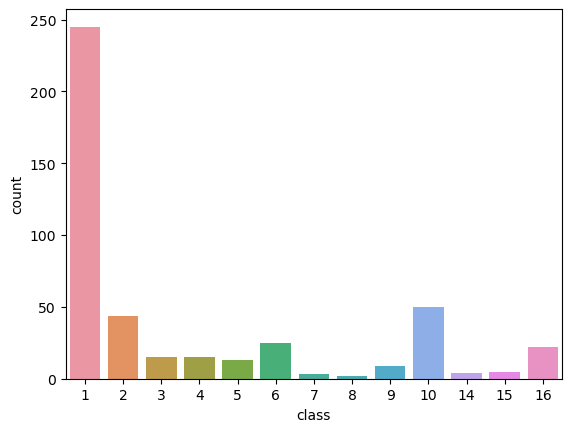

In [12]:
# Distribution of Target#
sns.countplot(x='class',data=data)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


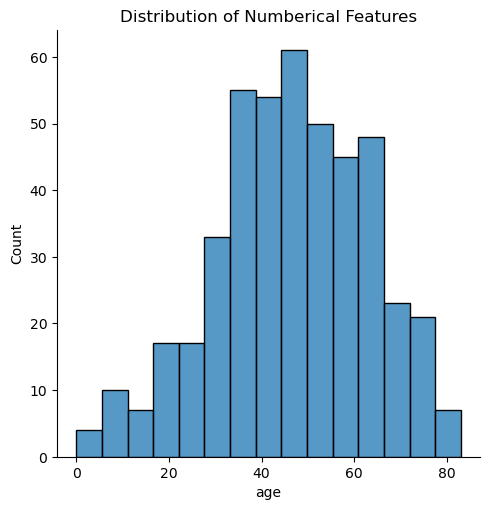

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


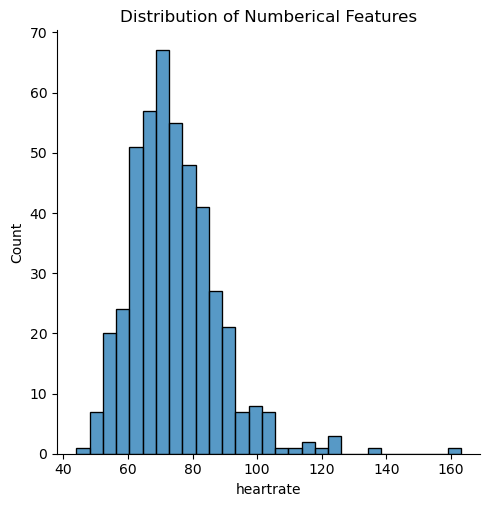

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


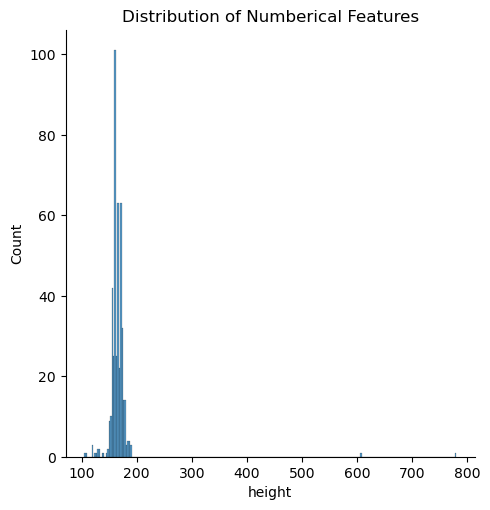

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


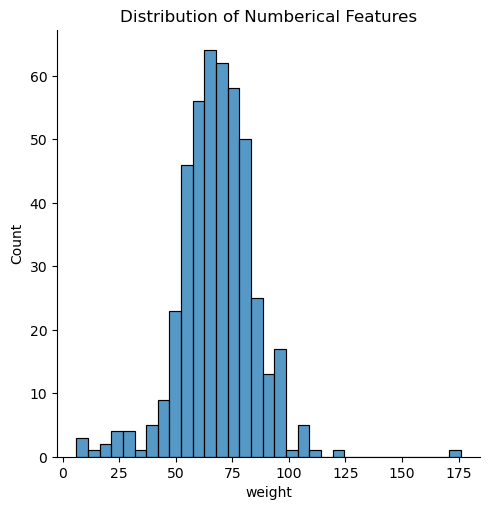

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


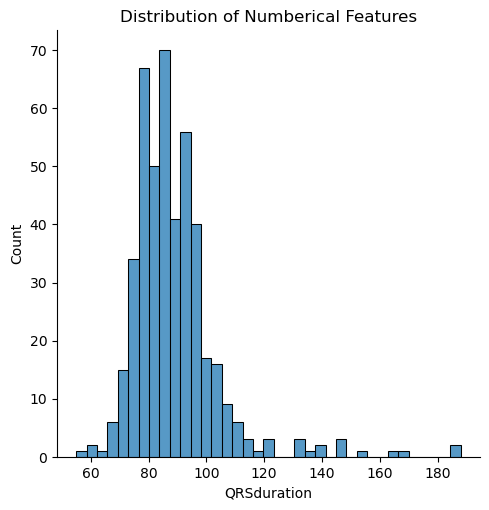

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


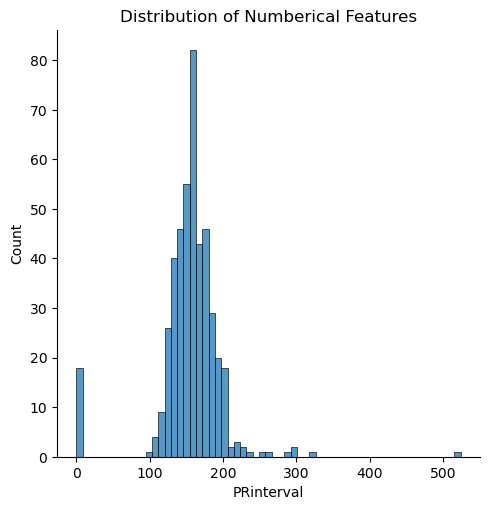

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


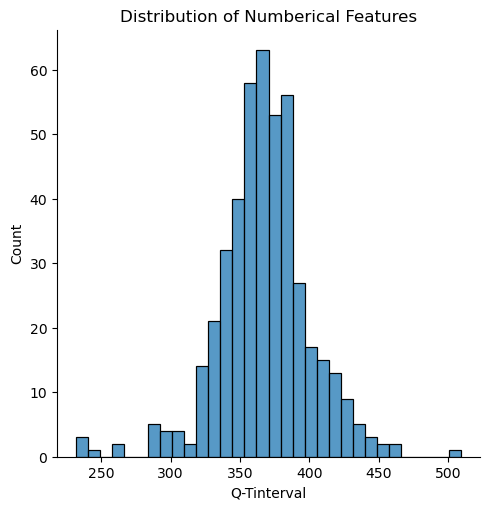

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


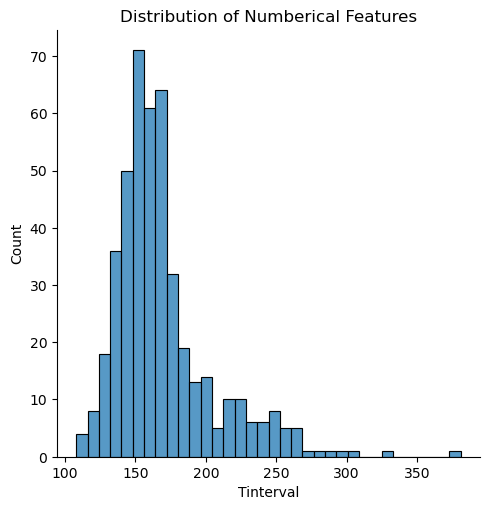

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


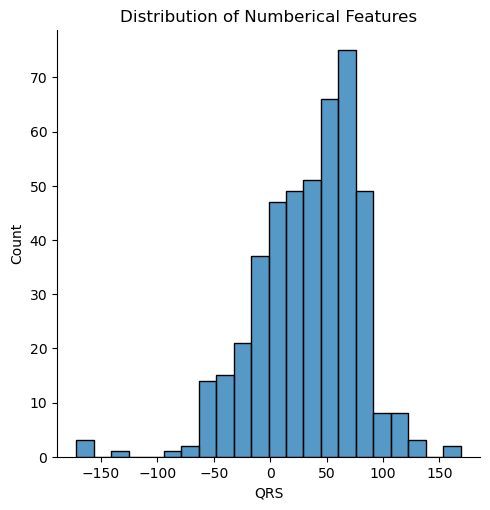

In [16]:
#distribution of features
numerical_features=['age','heartrate','height','weight','QRSduration','PRinterval','Q-Tinterval','Tinterval','QRS']
for column in data[numerical_features]:
    sns.displot(x=data[column])
    plt.title('Distribution of Numberical Features')
    plt.show()


In [10]:
# View features only has zero values #
column_sums=data.sum(skipna=True)
zero_columns_mask = column_sums == 0
# Filter the DataFrame using the mask
filtered_df = data.loc[:, zero_columns_mask]
print(filtered_df.shape)
print(filtered_df.columns)

(452, 17)
Index(['chDI_SPwave', 'chAVL_SPwave', 'chAVL_RRwaveExists',
       'chAVF_RPwaveExists', 'chV4_RPwaveExists', 'chV4_DD_RPwaveExists',
       'chV5_SPwave', 'chV5_RRwaveExists', 'chV5_RPwaveExists',
       'chV5_RTwaveExists', 'chV6_SPwave', 'chV6_DD_RPwaveExists',
       'chV6_RTwaveExists', 'chDI_SPwaveAmp', 'chAVL_SPwaveAmp',
       'chV5_SPwaveAmp', 'chV6_SPwaveAmp'],
      dtype='object')


In [12]:
correlation_matrix = data.corr()

# Display the correlation matrix
#print(correlation_matrix)

# top 10 correlated features with the target variable
target_correlations = correlation_matrix['class'].abs().sort_values(ascending=False)
top_correlated_features = target_correlations[1:25].index

# Display the correlation values for the top correlated features
print(correlation_matrix.loc[top_correlated_features, 'class'])


chV1_RPwave                    0.368876
QRSduration                    0.323879
chV1_intrinsicReflecttions     0.313982
chV2_RPwave                    0.282523
chV1_RPwaveAmp                 0.235488
chV2_RPwaveAmp                 0.218811
chDI_SwaveAmp                 -0.197555
chDI_Swave                     0.195198
chV3_SwaveAmp                 -0.189458
chDII_Swave                    0.183083
sex                           -0.178080
chV1_DD_RRwaveExists           0.174346
chAVR_Rwave                    0.173243
chDI_QRSTA                    -0.171763
chV4_Swave                     0.170670
chAVR_RwaveAmp                 0.165693
chV6_QwaveAmp                 -0.164321
chV5_QwaveAmp                 -0.162153
chV3_QRSA                     -0.159612
chDII_SwaveAmp                -0.158536
chAVL_intrinsicReflecttions    0.152534
chV3_JJwaveAmp                 0.151782
chV4_SwaveAmp                 -0.150610
chAVF_Swave                    0.143284
Name: class, dtype: float64


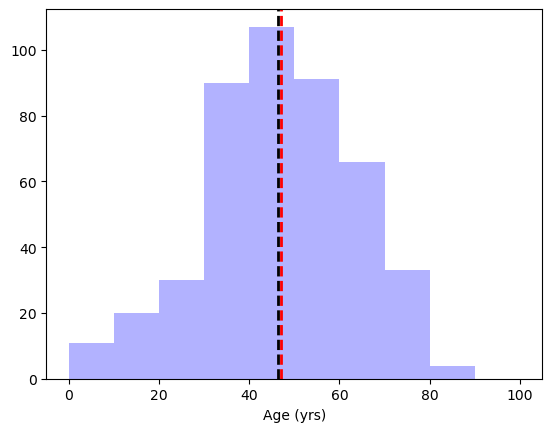

In [37]:
## Data Visualization## 
plt.hist(data.age, range=(0,100), label='Age', color='blue', alpha=0.3)
plt.axvline(data.age.mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(data.age.median(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Age (yrs)')
plt.show()


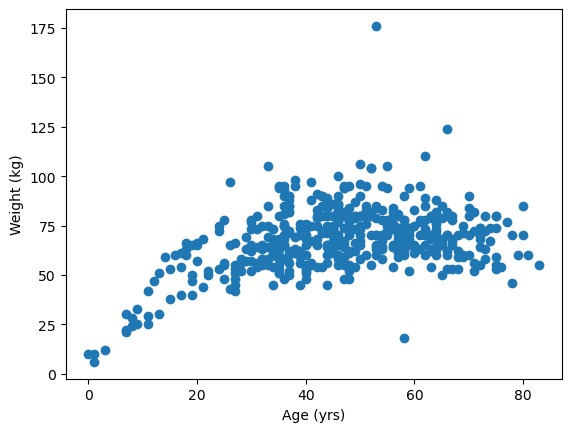

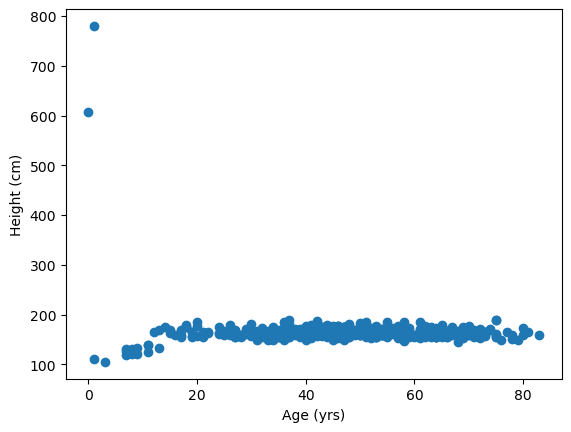

In [59]:
## Linear relationship between features##
plt.scatter(data.age, data.weight)
plt.xlabel('Age (yrs)')
plt.ylabel('Weight (kg)')
plt.show()


plt.scatter(data.age, data.height)
plt.xlabel('Age (yrs)')
plt.ylabel('Height (cm)')
plt.show()


In [4]:
##Missing Value Imputation Method #
##KNN imputer
KNNimputer=KNNImputer(n_neighbors=5)
KNNimputeddata=KNNimputer.fit_transform(data)

KNNimputedDF=pd.DataFrame(KNNimputeddata)

# Imputation outcome
KNNimputedDF.isnull().sum().sort_values(ascending=False)

KNNimputedDF.columns=data.columns
print(KNNimputedDF)




      age  sex  height  weight  QRSduration  PRinterval  Q-Tinterval  \
0    75.0  0.0   190.0    80.0         91.0       193.0        371.0   
1    56.0  1.0   165.0    64.0         81.0       174.0        401.0   
2    54.0  0.0   172.0    95.0        138.0       163.0        386.0   
3    55.0  0.0   175.0    94.0        100.0       202.0        380.0   
4    75.0  0.0   190.0    80.0         88.0       181.0        360.0   
..    ...  ...     ...     ...          ...         ...          ...   
447  53.0  1.0   160.0    70.0         80.0       199.0        382.0   
448  37.0  0.0   190.0    85.0        100.0       137.0        361.0   
449  36.0  0.0   166.0    68.0        108.0       176.0        365.0   
450  32.0  1.0   155.0    55.0         93.0       106.0        386.0   
451  78.0  1.0   160.0    70.0         79.0       127.0        364.0   

     Tinterval  Pinterval   QRS  ...  chV6_QwaveAmp  chV6_RwaveAmp  \
0        174.0      121.0 -16.0  ...            0.0            9.

In [10]:
## Check that all missing values are imputed 
KNNimputedDF.isnull().sum().sort_values(ascending=False)

age                 0
chDIII_SPwaveAmp    0
chAVR_QwaveAmp      0
chAVR_JJwaveAmp     0
chDIII_QRSTA        0
                   ..
chV2_Qwave          0
chV2_Rwave          0
chV2_Swave          0
chV2_RPwave         0
class               0
Length: 280, dtype: int64

[['J', 4648.818236563781], ['T', 3306.9049017914963], ['QRS', 2064.015167866884], ['PRinterval', 2010.8303033573375], ['chV3_QRSTA', 1395.9406103938152], ['height', 1381.634180680101], ['QRST', 1301.0469970370661], ['Tinterval', 1269.7158085277556], ['chV4_QRSTA', 1180.7239952024017], ['Q-Tinterval', 1114.5863665796753], ['chV3_QRSA', 1034.073140513706], ['P', 826.547181877048], ['chAVR_intrinsicReflecttions', 781.1354119655437], ['chV1_Qwave', 719.7435001864097], ['chV2_QRSTA', 710.5665676569274], ['Pinterval', 667.0155014422228], ['chV2_QRSA', 658.4253778231267], ['chDIII_Swave', 643.4047446186449], ['chV4_QRSA', 628.7403329376216], ['chAVR_Qwave', 615.7172850891825], ['chV5_QRSTA', 596.416633783333], ['chV1_Swave', 569.5633302592076], ['chV1_QRSA', 562.4015746718208], ['chAVF_Swave', 537.8919608343308], ['chDIII_Rwave', 533.8888213017287], ['chAVL_Swave', 529.003394619626], ['chAVL_Rwave', 512.1739301061554], ['chV6_Swave', 497.3229205502031], ['chDIII_Qwave', 479.8928634499539], ['

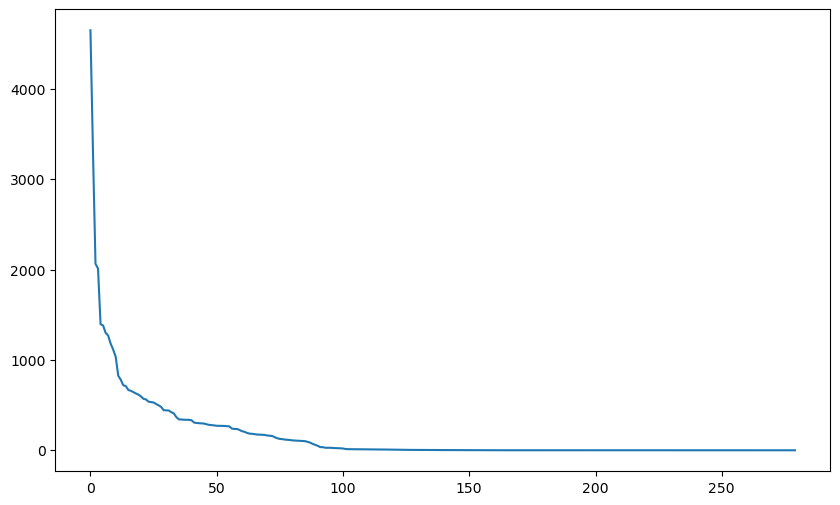

In [14]:
# Variance # 
var_list = []
var_temp = []
num_list = []
name_list =[]
cols=list(KNNimputedDF.columns.values)
for col1 in cols:
  var_temp.append(col1)
  var_temp.append(KNNimputedDF[col1].var())
  var_list.append(var_temp)
  var_temp=[]

var_list.sort(reverse = True, key=lambda x: x[1])
print(var_list)
for i in range(len(var_list)):
  num_list.append(var_list[i][1])
  name_list.append(var_list[i][0])
plt.figure(figsize=(10, 6))
plt.plot(num_list)
plt.show()

In [ ]:
#Correlation Matrix of imputed data#
correlation_matrix= KNNimputedDF.corr()
# Step 2: Set the correlation threshold 
correlation_threshold = 0.6

# Step 3: Find and remove correlated features
correlated_features = set()

# Loop through the correlation matrix
for i in range(len(KNNimputedDF.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            # Add the name of the highly correlated feature to the set
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
            print(correlated_features)

In [5]:
#Split the features and target
x = KNNimputedDF.drop("class", axis=1)
y = KNNimputedDF["class"]
print(x.shape, y.shape)


(452, 279) (452,)


In [6]:
# Reduced Feature set #
#Feature selection using recrusive elimination technique#
gbc= GradientBoostingClassifier(n_estimators=25, random_state=42)

selectedfeature=RFE(gbc,n_features_to_select=94)
selectedfeature.fit(x, y)
reducedX=selectedfeature.transform(x)
feature_mask = selectedfeature.support_
selected_feature_names = x.columns[feature_mask]
print(selected_feature_names)


Index(['height', 'weight', 'QRSduration', 'PRinterval', 'Tinterval',
       'Pinterval', 'QRS', 'T', 'P', 'QRST', 'J', 'heartrate', 'chDI_Rwave',
       'chDI_Swave', 'chDII_RPwave', 'chDIII_Rwave',
       'chDIII_intrinsicReflecttions', 'chAVR_DD_RPwaveExists', 'chAVL_Qwave',
       'chAVL_Rwave', 'chAVF_Qwave', 'chAVF_intrinsicReflecttions',
       'chV1_Qwave', 'chV1_Swave', 'chV1_intrinsicReflecttions',
       'chV1_DD_RRwaveExists', 'chV2_RPwave', 'chV3_intrinsicReflecttions',
       'chV3_DD_RPwaveExists', 'chV4_intrinsicReflecttions', 'chV5_Rwave',
       'chV5_intrinsicReflecttions', 'chV6_Rwave', 'chDI_RwaveAmp',
       'chDI_RPwaveAmp', 'chDI_TwaveAmp', 'chDI_QRSTA', 'chDII_QwaveAmp',
       'chDII_RwaveAmp', 'chDII_PwaveAmp', 'chDII_TwaveAmp', 'chDII_QRSTA',
       'chDIII_QwaveAmp', 'chDIII_RwaveAmp', 'chDIII_QRSTA', 'chAVR_JJwaveAmp',
       'chAVR_RwaveAmp', 'chAVR_SwaveAmp', 'chAVR_TwaveAmp', 'chAVR_QRSTA',
       'chAVL_PwaveAmp', 'chAVL_QRSA', 'chAVF_SwaveAmp', 'chAVF_

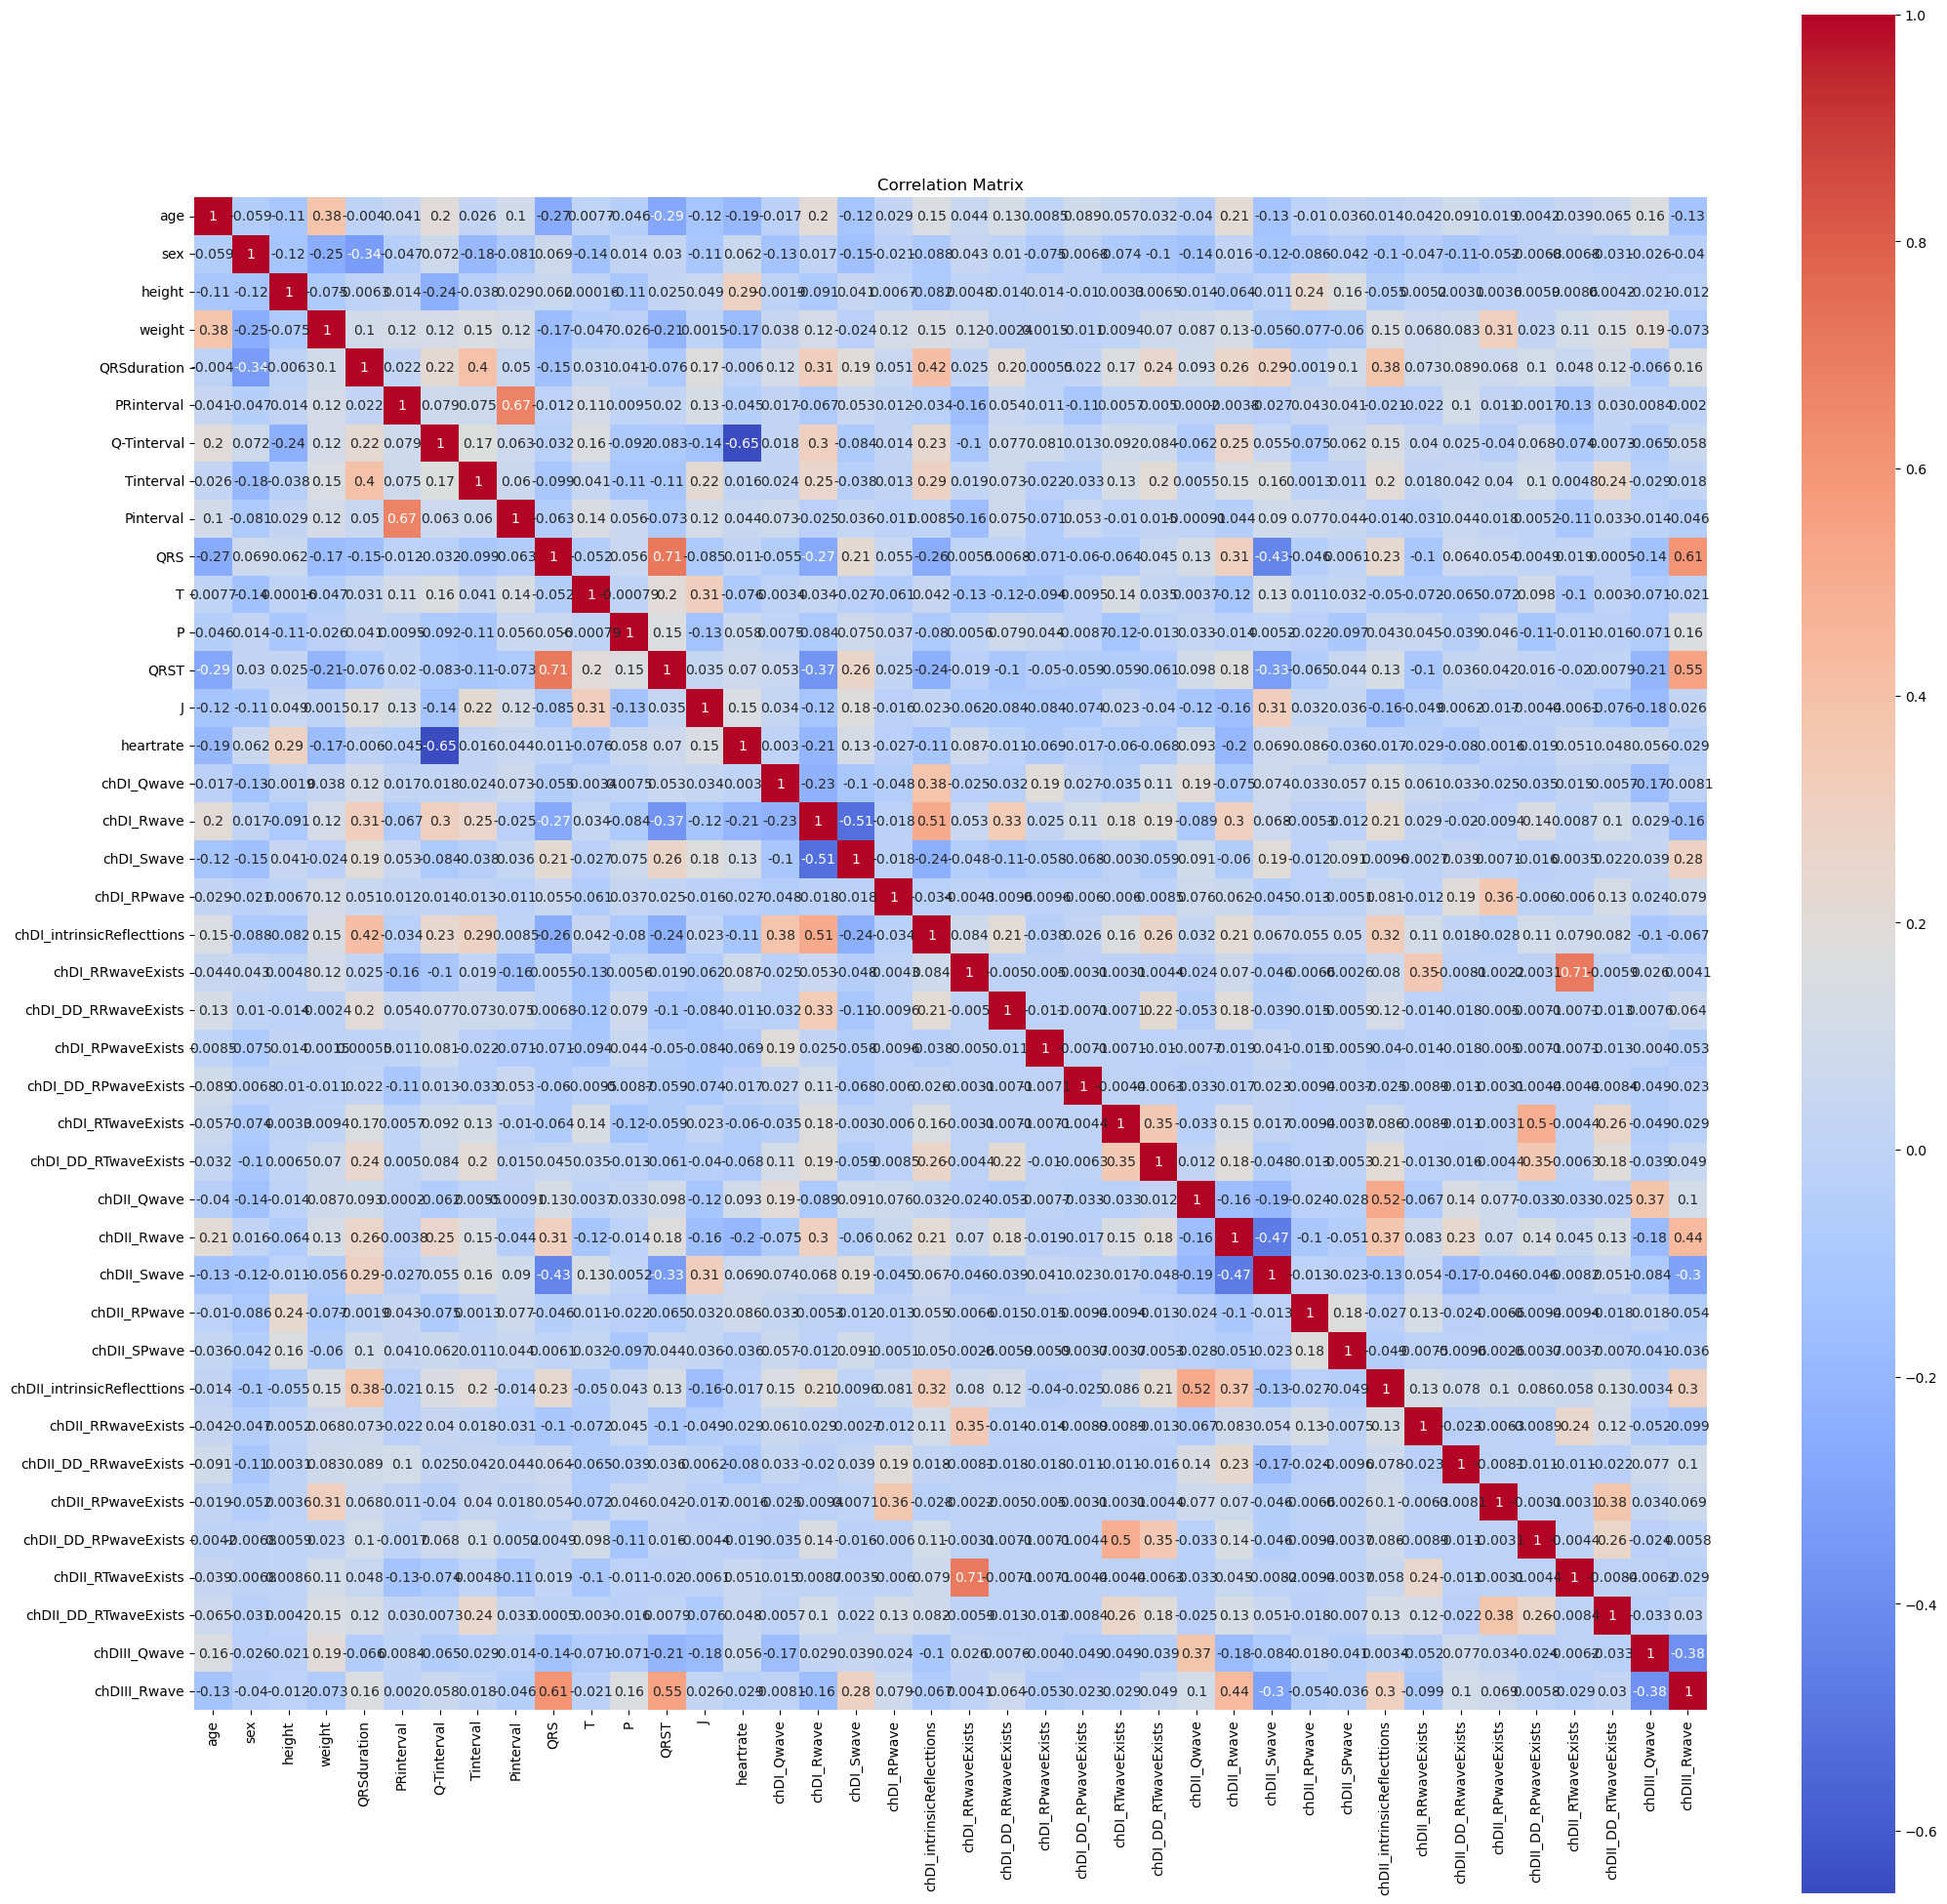

In [7]:
# Plot the correlation matrix

#drop cols with zero values to plot correlation matrix

corr_data=KNNimputedDF.drop(['chDI_SPwave', 'chAVL_SPwave', 'chAVL_RRwaveExists',
       'chAVF_RPwaveExists', 'chV4_RPwaveExists', 'chV4_DD_RPwaveExists',
       'chV5_SPwave', 'chV5_RRwaveExists', 'chV5_RPwaveExists',
       'chV5_RTwaveExists', 'chV6_SPwave', 'chV6_DD_RPwaveExists',
       'chV6_RTwaveExists', 'chDI_SPwaveAmp', 'chAVL_SPwaveAmp',
       'chV5_SPwaveAmp', 'chV6_SPwaveAmp'],axis=1)

correlation=corr_data.iloc[:,0:40].corr()
plt.figure(figsize=(25, 25))
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [9]:
#Outlier detection using z-scores
# Select the columns for outlier detection
#columns = cirrhosis_withoutnull[['Age', 'Cholesterol','Albumin', 'Copper','Bilirubin','Alk_Phos','SGOT','Platelets','Tryglicerides', 'Ascites', 'Prothrombin']]

# calculating  z-scores for each column
z_scores = np.abs((corr_data - corr_data.mean()) / corr_data.std())

threshold = 3

outlier_indices = np.where(z_scores > threshold)

# Create a mask to mark the outliers in the DataFrame
outlier_mask = np.zeros_like(corr_data, dtype=bool)
outlier_mask[outlier_indices] = True

# print the number of outliers in each column
num_outliers = np.sum(outlier_mask, axis=0)
for col, num in zip(corr_data, num_outliers):
    print(f"Number of outliers in {col}: {num}")

Number of outliers in age: 0
Number of outliers in sex: 0
Number of outliers in height: 2
Number of outliers in weight: 7
Number of outliers in QRSduration: 11
Number of outliers in PRinterval: 23
Number of outliers in Q-Tinterval: 7
Number of outliers in Tinterval: 6
Number of outliers in Pinterval: 19
Number of outliers in QRS: 4
Number of outliers in T: 9
Number of outliers in P: 10
Number of outliers in QRST: 4
Number of outliers in J: 4
Number of outliers in heartrate: 7
Number of outliers in chDI_Qwave: 4
Number of outliers in chDI_Rwave: 10
Number of outliers in chDI_Swave: 1
Number of outliers in chDI_RPwave: 4
Number of outliers in chDI_intrinsicReflecttions: 4
Number of outliers in chDI_RRwaveExists: 1
Number of outliers in chDI_DD_RRwaveExists: 5
Number of outliers in chDI_RPwaveExists: 5
Number of outliers in chDI_DD_RPwaveExists: 2
Number of outliers in chDI_RTwaveExists: 2
Number of outliers in chDI_DD_RTwaveExists: 4
Number of outliers in chDII_Qwave: 6
Number of outlier

In [18]:
# split the featuresubset, create 2 splits
#one with 80:20 and another one with 90:10
x_train, x_test,y_train,y_test=train_test_split(reducedX,y,test_size=0.2,random_state=2, stratify=y)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

#90:10 split
x_train1, x_test1,y_train1,y_test1=train_test_split(reducedX,y,test_size=0.1,random_state=2, stratify=y)
print(x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape)

(361, 94) (91, 94) (361,) (91,)
(406, 94) (46, 94) (406,) (46,)


In [19]:
# Normalization or feature scaling
scaler= StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)


x_train1=scaler.fit_transform(x_train1)
x_test1=scaler.fit_transform(x_test1)

In [9]:
rfc=RandomForestClassifier()
#parameters = {'n_estimators': [10, 20, 30, 40], 'max_features': ['sqrt', 'log2'], 'max_depth' : [6, 7, 8, 9], 'criterion' :['gini', 'entropy', 'log_loss'], 'min_samples_leaf':[1, 2, 3]} # daje 0.59 accuracy s najboljim parametrima
parameters={'max_depth':[100, 150, 200, 250], 'n_estimators':[10, 20, 30, 40, 50], 'min_samples_leaf':[1, 2, 3, 4]}
rfc_gs = GridSearchCV(estimator=rfc, param_grid=parameters, cv=10)
rfc_gs.fit(x_train, y_train)

print("best hyperparameters: ", rfc_gs.best_params_)
print("accuracy with the best parameters: ", rfc_gs.best_score_)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


best hyperparameters:  {'max_depth': 200, 'min_samples_leaf': 2, 'n_estimators': 20}
accuracy with the best parameters:  0.7397897897897898


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuacy of SVM: 78.02197802197803
Accuacy of MLP: 76.92307692307693
Accuacy of KNN: 67.03296703296702
Accuacy of RFC: 78.02197802197803
Accuacy of NB: 10.989010989010989
Accuacy of lgbm: 78.02197802197803


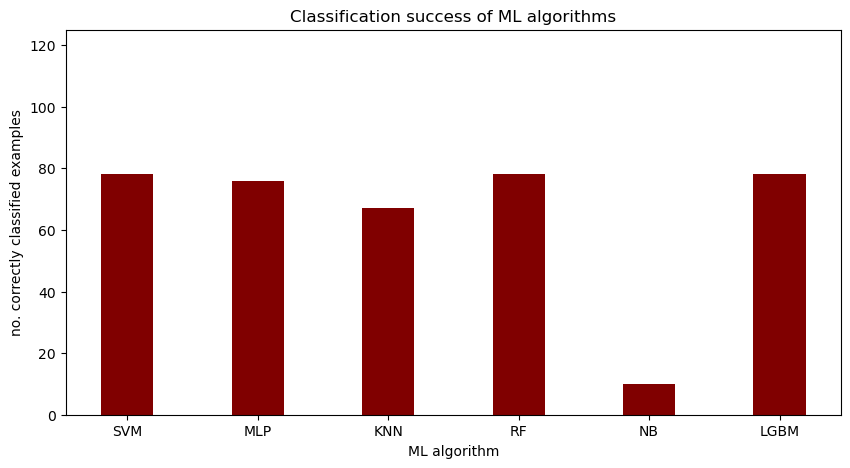

Kappa score of SVM: 0.671123960968558
Kappa score of MLP: 0.6290760869565217
Kappa score KNN: 0.41566780821917804
Kappa score RFC: 0.6287229702162382
Kappa score NB: 0.012062726176115701
Kappa score lgbm: 0.6396753118194416


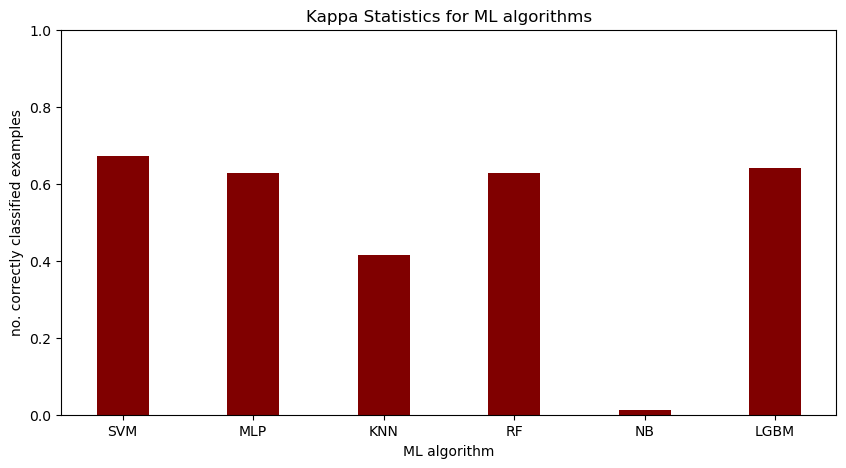

SVM_report 
               precision    recall  f1-score   support

         1.0       0.86      0.90      0.88        49
         2.0       0.67      0.67      0.67         9
         3.0       1.00      1.00      1.00         3
         4.0       1.00      1.00      1.00         3
         5.0       0.50      0.67      0.57         3
         6.0       0.75      0.60      0.67         5
         7.0       0.00      0.00      0.00         1
         9.0       1.00      0.50      0.67         2
        10.0       0.80      0.80      0.80        10
        14.0       0.50      1.00      0.67         1
        15.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         4

    accuracy                           0.78        91
   macro avg       0.59      0.59      0.58        91
weighted avg       0.77      0.78      0.77        91

KNN_report 
               precision    recall  f1-score   support

         1.0       0.65      0.94      0.77        4

In [9]:
# classification models for train test split as 80:20

svm_t = SVC(C=1,kernel="linear",random_state=42,decision_function_shape="ovr").fit(x_train, y_train)

mlp_classifier = MLPClassifier(hidden_layer_sizes=(200), activation='tanh', solver='sgd', learning_rate='adaptive', max_iter=200, random_state=42)
mlp_classifier.fit(x_train, y_train)

knn_t = KNeighborsClassifier(n_neighbors=3) .fit(x_train, y_train)

rfc_t = RandomForestClassifier(criterion= 'gini', n_estimators=20, random_state=42,min_samples_leaf=2).fit(x_train, y_train)

lgbm_classifier = lgb.LGBMClassifier(n_estimators=100, random_state=42).fit(x_train,y_train)

nb_model = GaussianNB().fit(x_train,y_train)


svm_pred = svm_t.predict(x_test)
knn_pred = knn_t.predict(x_test)
MLP_pred = mlp_classifier.predict(x_test)
rfc_pred = rfc_t.predict(x_test)
nb_pred=nb_model.predict(x_test)
lgbm_pred=lgbm_classifier.predict(x_test)

svm_acc = accuracy_score(y_test, svm_pred)*100
knn_acc = accuracy_score(y_test, knn_pred)*100
MLP_acc=accuracy_score(y_test, MLP_pred)*100
rfc_acc = accuracy_score(y_test, rfc_pred)*100
nb_acc = accuracy_score(y_test,nb_pred)*100
lgbm_acc=accuracy_score(y_test,lgbm_pred)*100

print ("Accuacy of SVM:",svm_acc)
print("Accuacy of MLP:", MLP_acc)
print ("Accuacy of KNN:", knn_acc)
print ("Accuacy of RFC:",rfc_acc)
print("Accuacy of NB:",nb_acc)
print("Accuacy of lgbm:",lgbm_acc)

bar_data = dict()
bar_data['SVM'] = int(svm_acc)
bar_data['MLP'] = int(MLP_acc)
bar_data['KNN'] = int(knn_acc)
bar_data['RF'] = int(rfc_acc)
bar_data['NB'] = int(nb_acc)
bar_data['LGBM'] = int(lgbm_acc)


algs = list(bar_data.keys())
values = list(bar_data.values())

fig = plt.figure(figsize = (10, 5))
plt.ylim(top=125)
plt.bar(algs, values, color ='maroon',
        width = 0.4)

plt.xlabel("ML algorithm")
plt.ylabel("no. correctly classified examples")
plt.title("Classification success of ML algorithms")
plt.show()


# Kappa Statistics
svm_Kappa = cohen_kappa_score(y_test, svm_pred)
knn_kappa = cohen_kappa_score(y_test, knn_pred)
MLP_kappa=cohen_kappa_score(y_test, MLP_pred)
rfc_kappa = cohen_kappa_score(y_test, rfc_pred)
nb_kappa = cohen_kappa_score(y_test,nb_pred)
lgbm_kappa=cohen_kappa_score(y_test,lgbm_pred)

print ("Kappa score of SVM:",svm_Kappa)
print("Kappa score of MLP:", MLP_kappa)
print ("Kappa score KNN:", knn_kappa)
print ("Kappa score RFC:",rfc_kappa)
print("Kappa score NB:",nb_kappa)
print("Kappa score lgbm:",lgbm_kappa)

bar_data = dict()
bar_data['SVM'] = float(svm_Kappa)
bar_data['MLP'] = float(MLP_kappa)
bar_data['KNN'] = float(knn_kappa)
bar_data['RF'] = float(rfc_kappa)
bar_data['NB'] = float(nb_kappa)
bar_data['LGBM'] = float(lgbm_kappa)


algs = list(bar_data.keys())
values = list(bar_data.values())

fig = plt.figure(figsize = (10, 5))
plt.ylim(top=1)
plt.bar(algs, values, color ='maroon',
        width = 0.4)

plt.xlabel("ML algorithm")
plt.ylabel("no. correctly classified examples")
plt.title("Kappa Statistics for ML algorithms")
plt.show()

# classification report
SVM_report= classification_report (y_test, svm_pred)
knn_report = classification_report(y_test, knn_pred)
MLP_report=classification_report(y_test, MLP_pred)
rfc_report = classification_report(y_test, rfc_pred)
nb_report= classification_report(y_test,nb_pred)
lgbm_report=classification_report(y_test,lgbm_pred)

print("SVM_report \n",SVM_report)

print("KNN_report \n",knn_report)

print("MLP_report \n",MLP_report)

print("RFC_report \n",rfc_report)

print("NB_report \n",nb_report)

print("lgbm_report \n",lgbm_report) 




/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuacy of SVM: 82.6086956521739
Accuacy of MLP: 82.6086956521739
Accuacy of KNN: 69.56521739130434
Accuacy of RFC: 84.78260869565217
Accuacy of NB: 10.869565217391305
Accuacy of lgbm: 89.13043478260869


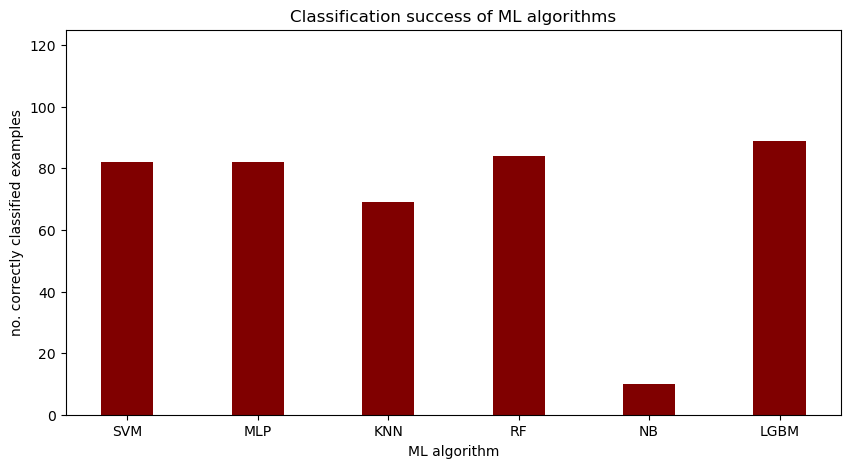

Kappa score of SVM: 0.7412095639943741
Kappa score of MLP: 0.744266851980542
Kappa score KNN: 0.45469940728196456
Kappa score RFC: 0.753256704980843
Kappa score NB: 0.0010593220338982468
Kappa score lgbm: 0.8323615160349854


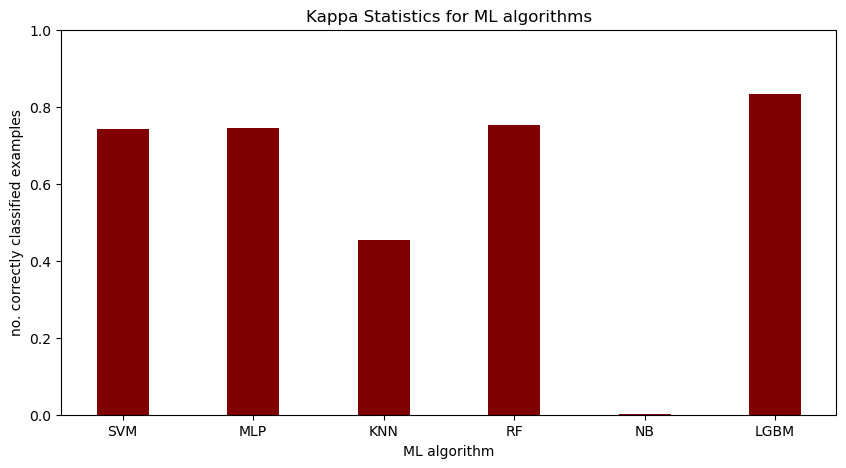

SVM_report 
               precision    recall  f1-score   support

         1.0       0.96      0.96      0.96        25
         2.0       0.67      1.00      0.80         4
         3.0       1.00      1.00      1.00         2
         4.0       1.00      1.00      1.00         2
         5.0       0.50      1.00      0.67         1
         6.0       1.00      0.33      0.50         3
         7.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         1
        10.0       0.67      0.80      0.73         5
        15.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         2

    accuracy                           0.83        46
   macro avg       0.53      0.55      0.51        46
weighted avg       0.82      0.83      0.80        46

KNN_report 
               precision    recall  f1-score   support

         1.0       0.67      0.96      0.79        25
         2.0       0.75      0.75      0.75         

In [10]:
# classification models for train test split as 90:10

svm_t = SVC(C=1,kernel="linear",random_state=42,decision_function_shape="ovr").fit(x_train1, y_train1)

mlp_classifier = MLPClassifier(hidden_layer_sizes=(200), activation='tanh', solver='sgd', learning_rate='adaptive', max_iter=200, random_state=42)
mlp_classifier.fit(x_train1, y_train1)

knn_t = KNeighborsClassifier(n_neighbors=3) .fit(x_train1, y_train1)

rfc_t = RandomForestClassifier(criterion= 'gini', n_estimators=20, random_state=42,min_samples_leaf=2).fit(x_train1, y_train1)

lgbm_classifier = lgb.LGBMClassifier(n_estimators=100, random_state=42).fit(x_train1,y_train1)

nb_model = GaussianNB().fit(x_train1,y_train1)


svm_pred = svm_t.predict(x_test1)
knn_pred = knn_t.predict(x_test1)
MLP_pred = mlp_classifier.predict(x_test1)
rfc_pred = rfc_t.predict(x_test1)
nb_pred=nb_model.predict(x_test1)
lgbm_pred=lgbm_classifier.predict(x_test1)

svm_acc = accuracy_score(y_test1, svm_pred)*100
knn_acc = accuracy_score(y_test1, knn_pred)*100
MLP_acc=accuracy_score(y_test1, MLP_pred)*100
rfc_acc = accuracy_score(y_test1, rfc_pred)*100
nb_acc = accuracy_score(y_test1,nb_pred)*100
lgbm_acc=accuracy_score(y_test1,lgbm_pred)*100

print ("Accuacy of SVM:",svm_acc)
print("Accuacy of MLP:", MLP_acc)
print ("Accuacy of KNN:", knn_acc)
print ("Accuacy of RFC:",rfc_acc)
print("Accuacy of NB:",nb_acc)
print("Accuacy of lgbm:",lgbm_acc)

bar_data = dict()
bar_data['SVM'] = int(svm_acc)
bar_data['MLP'] = int(MLP_acc)
bar_data['KNN'] = int(knn_acc)
bar_data['RF'] = int(rfc_acc)
bar_data['NB'] = int(nb_acc)
bar_data['LGBM'] = int(lgbm_acc)


algs = list(bar_data.keys())
values = list(bar_data.values())

fig = plt.figure(figsize = (10, 5))
plt.ylim(top=125)
plt.bar(algs, values, color ='maroon',
        width = 0.4)

plt.xlabel("ML algorithm")
plt.ylabel("no. correctly classified examples")
plt.title("Classification success of ML algorithms")
plt.show()


# Kappa Statistics
svm_Kappa = cohen_kappa_score(y_test1, svm_pred)
knn_kappa = cohen_kappa_score(y_test1, knn_pred)
MLP_kappa=cohen_kappa_score(y_test1, MLP_pred)
rfc_kappa = cohen_kappa_score(y_test1, rfc_pred)
nb_kappa = cohen_kappa_score(y_test1,nb_pred)
lgbm_kappa=cohen_kappa_score(y_test1,lgbm_pred)

print ("Kappa score of SVM:",svm_Kappa)
print("Kappa score of MLP:", MLP_kappa)
print ("Kappa score KNN:", knn_kappa)
print ("Kappa score RFC:",rfc_kappa)
print("Kappa score NB:",nb_kappa)
print("Kappa score lgbm:",lgbm_kappa)

bar_data = dict()
bar_data['SVM'] = float(svm_Kappa)
bar_data['MLP'] = float(MLP_kappa)
bar_data['KNN'] = float(knn_kappa)
bar_data['RF'] = float(rfc_kappa)
bar_data['NB'] = float(nb_kappa)
bar_data['LGBM'] = float(lgbm_kappa)


algs = list(bar_data.keys())
values = list(bar_data.values())

fig = plt.figure(figsize = (10, 5))
plt.ylim(top=1)
plt.bar(algs, values, color ='maroon',
        width = 0.4)

plt.xlabel("ML algorithm")
plt.ylabel("no. correctly classified examples")
plt.title("Kappa Statistics for ML algorithms")
plt.show()

# classification report
SVM_report= classification_report (y_test1, svm_pred)
knn_report = classification_report(y_test1, knn_pred)
MLP_report=classification_report(y_test1, MLP_pred)
rfc_report = classification_report(y_test1, rfc_pred)
nb_report= classification_report(y_test1,nb_pred)
lgbm_report=classification_report(y_test1,lgbm_pred)

print("SVM_report \n",SVM_report)

print("KNN_report \n",knn_report)

print("MLP_report \n",MLP_report)

print("RFC_report \n",rfc_report)

print("NB_report \n",nb_report)

print("lgbm_report \n",lgbm_report)




[[25  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0]
 [ 0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  1  0  0]]


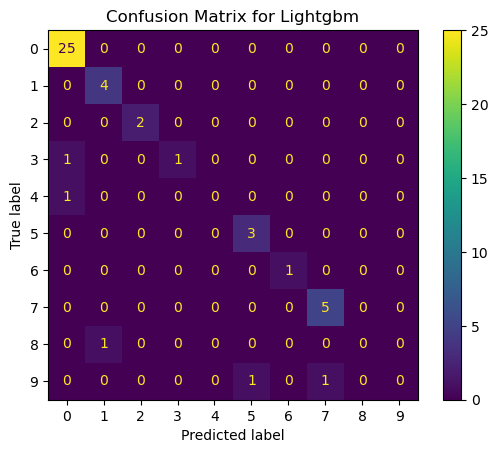

In [11]:
from sklearn import metrics
lgbmconfusionmatrix=confusion_matrix(y_test1,lgbm_pred)
print(lgbmconfusionmatrix)

display = metrics.ConfusionMatrixDisplay(confusion_matrix = lgbmconfusionmatrix)
display.plot()
plt.title('Confusion Matrix for Lightgbm')
plt.show()

In [ ]:
#RandomizedSearchCV hyperparameter turning for MLP#
model=MLPClassifier()
parameters = {
    
'activation':['identity', 'logistic', 'tanh', 'relu'],
'solver':['lbfgs', 'sgd', 'adam'],
'learning_rate':['constant', 'invscaling', 'adaptive'],
'max_iter':[100,200]
       
    }

classifier=RandomizedSearchCV(model,parameters,cv=5)
classifier.fit(x_train,y_train)
classifier.cv_results_
results2=pd.DataFrame(classifier.cv_results_)
#print(results2)
best_param2 = classifier.best_params_
print(best_param2)
high_accuracy2=classifier.best_score_
print(high_accuracy2)

In [ ]:
#RFC hyper parameter tuning#
rfc=RandomForestClassifier()
#parameters = {'n_estimators': [10, 20, 30, 40], 'max_features': ['sqrt', 'log2'], 'max_depth' : [6, 7, 8, 9], 'criterion' :['gini', 'entropy', 'log_loss'], 'min_samples_leaf':[1, 2, 3]} # daje 0.59 accuracy s najboljim parametrima
parameters={'max_depth':[100, 150, 200, 250], 'n_estimators':[10, 20, 30, 40, 50], 'min_samples_leaf':[1, 2, 3, 4]}
rfc_gs = GridSearchCV(estimator=rfc, param_grid=parameters, cv=10)
rfc_gs.fit(x_train, y_train)

print("best hyperparameters: ", rfc_gs.best_params_)
print("accuracy with the best parameters: ", rfc_gs.best_score_)

In [ ]:
#svm hyper parameter tuning#

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 'gamma': [0.1, 0.01, 0.001, 0.0009, 0.0005, 0.0001]}
svm = SVC()

svm_gs = GridSearchCV(svm, parameters)
svm_gs.fit(x_train, y_train)
GridSearchCV(estimator=SVC(), param_grid=parameters, scoring='accuracy', cv=10)

print("best hyperparameters: ", svm_gs.best_params_)
print("accuracy with the best parameters: ", svm_gs.best_score_)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=30.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=30.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=30.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn'

Cross validation score of SVM: 0.6462500000000002
Cross validation score of MLP: 0.6281944444444445
Cross validation score of KNN: 0.6084722222222223
Cross validation score of RFC: 0.7458333333333335
Cross validation score of NB: 0.5176388888888889
Cross validation score of lgbm: 0.7504166666666668


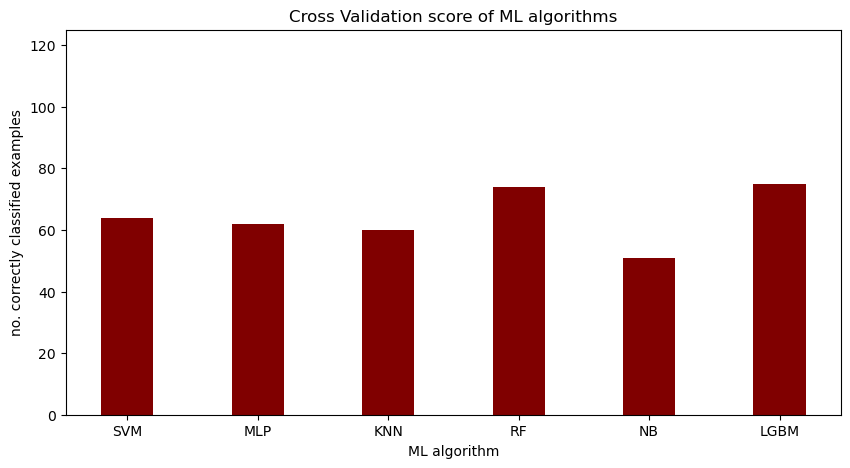

In [30]:
# cross val score of classification models
lgbm_score=cross_val_score(lgbm_classifier,reducedX,y,cv=30,scoring='accuracy').mean()
svm_score=cross_val_score(svm_t,reducedX,y,cv=30,scoring='accuracy').mean()
mlp_score=cross_val_score(mlp_classifier,reducedX,y,cv=30,scoring='accuracy').mean()
knn_score=cross_val_score(knn_t,reducedX,y,cv=30,scoring='accuracy').mean()
rfc_score=cross_val_score(rfc_t,reducedX,y,cv=30,scoring='accuracy').mean()
nb_score=cross_val_score(nb_model,reducedX,y,cv=30,scoring='accuracy').mean()


print ("Cross validation score of SVM:",svm_score)
print("Cross validation score of MLP:", mlp_score)
print ("Cross validation score of KNN:", knn_score)
print ("Cross validation score of RFC:",rfc_score)
print("Cross validation score of NB:",nb_score)
print("Cross validation score of lgbm:",lgbm_score)

bar_data = dict()
bar_data['SVM'] = int(svm_score * 100)
bar_data['MLP'] = int(mlp_score *100)
bar_data['KNN'] = int(knn_score * 100)
bar_data['RF'] = int(rfc_score * 100)
bar_data['NB'] = int(nb_score *100)
bar_data['LGBM'] = int(lgbm_score *100)


algs = list(bar_data.keys())
values = list(bar_data.values())

fig = plt.figure(figsize = (10, 5))
plt.ylim(top=125)
plt.bar(algs, values, color ='maroon',
        width = 0.4)

plt.xlabel("ML algorithm")
plt.ylabel("no. correctly classified examples")
plt.title("Cross Validation score of ML algorithms")
plt.show()

In [16]:

#Stratified k-fold#
#Normalize the features selected from Original Dataset#
scaler= StandardScaler()
reducedX=scaler.fit_transform(reducedX)

# Labelling#
X = reducedX  # Features
y = y    # Target labels

# Number of desired folds (k)
n_splits = 30

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Iterate through the splits
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Replace the following with your model training and evaluation code
    # For example, you can train your model on X_train and y_train and evaluate it on X_test and y_test
    model= lgbm_classifier.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    
    # Print or store the evaluation results
    print("Model Score",accuracy.mean())


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=30.
  warnings.warn(


Accuracy: 0.5625
Accuracy: 0.625
Accuracy: 0.7333333333333333
Accuracy: 0.7333333333333333
Accuracy: 0.8
Accuracy: 0.8
Accuracy: 0.8
Accuracy: 0.8
Accuracy: 0.6666666666666666
Accuracy: 0.8
Accuracy: 0.8666666666666667
Accuracy: 0.8666666666666667
Accuracy: 0.8
Accuracy: 0.6666666666666666
Accuracy: 0.8666666666666667
Accuracy: 0.8
Accuracy: 0.6666666666666666
Accuracy: 0.6666666666666666
Accuracy: 0.8666666666666667
Accuracy: 0.8
Accuracy: 0.7333333333333333
Accuracy: 0.8666666666666667
Accuracy: 0.7333333333333333
Accuracy: 0.7333333333333333
Accuracy: 0.6666666666666666
Accuracy: 0.7333333333333333
Accuracy: 0.7333333333333333
Accuracy: 0.5333333333333333
Accuracy: 0.6666666666666666
Accuracy: 0.8666666666666667


In [20]:
print('Model Score for LightGBM',accuracy.mean())

Model Score for LightGBM 0.8666666666666667
